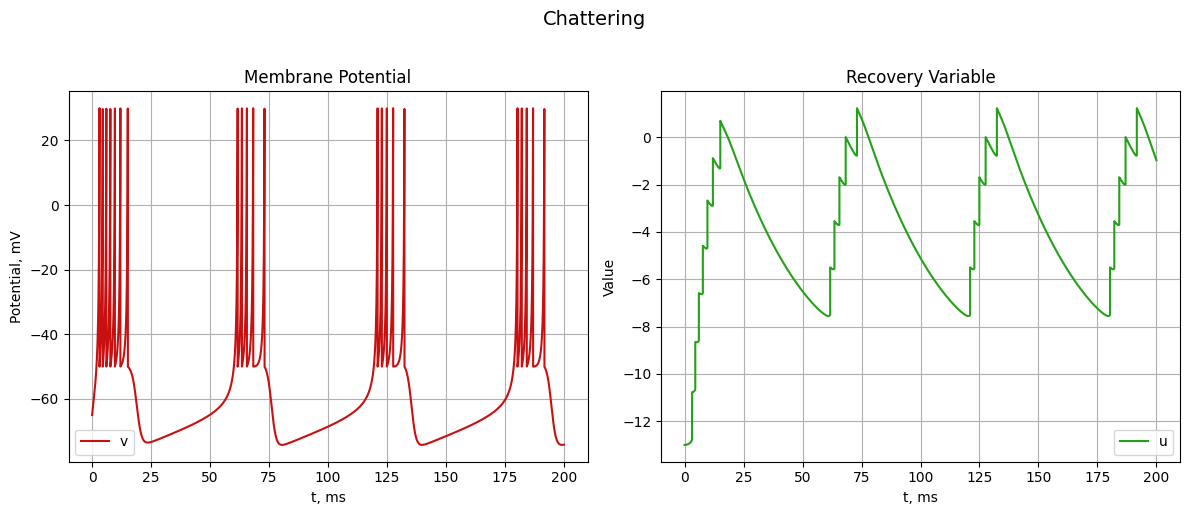

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from typing import Tuple, Dict

# Регулярно-спайковые
regular_spiking_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -65,
    'd': 8,
    'v0': -65,
    'I': 10,
    'tt': 'Regular spiking'
}

# Быстро-спайковые
fast_spiking_params = {
    'a': 0.1,
    'b': 0.2,
    'c': -65,
    'd': 2,
    'v0': -70,
    'I': 15,
    'tt': 'Fast spiking'
}

# Низкопороговые спайковые
low_threshold_spiking_params = {
    'a': 0.02,
    'b': 0.25,
    'c': -65,
    'd': 2,
    'v0': -70,
    'I': 7,
    'tt': 'Low-threshold spiking'
}

# Резиллерно-спайковые
resonator_params = {
    'a': 0.1,
    'b': 0.26,
    'c': -65,
    'd': 2,
    'v0': -65,
    'I': 10,
    'tt': 'Resonator'
}

# Интринсивно-всплесковые
intrinsically_bursting_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -55,
    'd': 4,
    'v0': -60,
    'I': 10,
    'tt': 'Intrinsically bursting'
}

# Частотные
chattering_params = {
    'a': 0.02,
    'b': 0.2,
    'c': -50,
    'd': 2,
    'v0': -65,
    'I': 10,
    'tt': 'Chattering'
}


def izhikevich_model(state, t, params):
    v, u = state
    a, b, I = params['a'], params['b'], params['I']

    dvdt = 0.04 * v**2 + 5 * v + 140 - u + I
    dudt = a * (b * v - u)
    return [dvdt, dudt]


def simulate_izhikevich(params, t_max=200, dt=0.001):
    # Извлекаем параметры
    a, b, c, d = params['a'], params['b'], params['c'], params['d']
    v0, u0 = params['v0'], params['b'] * params['v0']
    I = params['I']

    # Временные точки
    t = np.arange(0, t_max, dt)
    n_steps = len(t)

    # Массивы для результатов
    v = np.zeros(n_steps)
    u = np.zeros(n_steps)
    v[0], u[0] = v0, u0

    # Интегрирование с обработкой спайков
    for i in range(1, n_steps):
        # Интегрируем на одном шаге
        state = [v[i-1], u[i-1]]
        new_state = odeint(izhikevich_model, state, [0, dt], args=(params,))[1]

        v[i], u[i] = new_state

        # Проверяем условие спайка
        if v[i] >= 30:
            v[i] = c
            u[i] += d

    return t, v, u

# Запуск симуляции
t, v, u = simulate_izhikevich(chattering_params)

# Построение графиков
DARK_PURPLE = '#c91010'
DARK_GREEN = '#23a118'

plt.figure(figsize=(12, 5))

# Общий заголовок
plt.suptitle(chattering_params['tt'], fontsize=14, y=1.02)

# График v(t)
plt.subplot(1, 2, 1)
plt.plot(t, v, color=DARK_PURPLE)
plt.title('Membrane Potential')
plt.legend('v(t)')
plt.xlabel('t, ms')
plt.ylabel('Potential, mV')
plt.grid(True)

# График u(t)
plt.subplot(1, 2, 2)
plt.plot(t, u, color=DARK_GREEN)
plt.title('Recovery Variable')
plt.legend('u(t)')
plt.xlabel('t, ms')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.savefig('chattering.png', dpi=300, bbox_inches='tight')
plt.show()

from google.colab import files
files.download('chattering.png')